In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
data_ra =  pd.read_csv("River_Arno.csv")
data_ra.dropna(inplace=True)

In [3]:
x_ra = data_ra.drop(["Date", "Hydrometry_Nave_di_Rosano"], axis=1)
y_ra = data_ra[["Hydrometry_Nave_di_Rosano"]]
X_train_ra = x_ra.iloc[:1000,:]
X_test_ra = x_ra.iloc[1001:,:]
y_train_ra = y_ra.iloc[:1000,:]
y_test_ra = y_ra.iloc[1001:,:]
scaler = MinMaxScaler()
X_train_scaled_ra = scaler.fit_transform(X_train_ra)
X_test_scaled_ra = scaler.transform(X_test_ra)

In [4]:
def mlp_model_ra(optimizer, neurons):
    input_layer = keras.Input(shape=(15,))
    hidden_1 = keras.layers.Dense(neurons, activation = 'relu')(input_layer)
    output_layer = keras.layers.Dense(1, activation='linear')(hidden_1)
    model_ra = keras.Model(input_layer, output_layer)
    model_ra.compile(optimizer=optimizer, loss="mse", metrics="accuracy", weighted_metrics=['mse'])
    return model_ra

Epoch 1/100
63/63 [==============================] - 0s 3ms/step - loss: 2.2884 - accuracy: 0.0000e+00 - mse: 2.2884 - val_loss: 1.0972 - val_accuracy: 0.0000e+00 - val_mse: 1.0972
Epoch 2/100
63/63 [==============================] - 0s 1ms/step - loss: 1.4582 - accuracy: 0.0020 - mse: 1.4582 - val_loss: 0.5540 - val_accuracy: 0.0145 - val_mse: 0.5540
Epoch 3/100
63/63 [==============================] - 0s 1ms/step - loss: 0.8015 - accuracy: 0.0050 - mse: 0.8015 - val_loss: 0.2293 - val_accuracy: 0.0145 - val_mse: 0.2293
Epoch 4/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4969 - accuracy: 0.0050 - mse: 0.4969 - val_loss: 0.1765 - val_accuracy: 0.0145 - val_mse: 0.1765
Epoch 5/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4223 - accuracy: 0.0050 - mse: 0.4223 - val_loss: 0.1769 - val_accuracy: 0.0145 - val_mse: 0.1769
Epoch 6/100
63/63 [==============================] - 0s 1ms/step - loss: 0.3950 - accuracy: 0.0050 - mse: 0.3950 - val_loss: 0.

,0
0,1.283754
1,1.181870
2,1.157341
3,1.141851
4,1.257885
...,...
270,1.142848
271,1.155801
272,1.224358
273,1.202140


,Hydrometry_Nave_di_Rosano
0,1.06
1,1.08
2,1.08
3,1.09
4,1.07
...,...
270,0.99
271,1.01
272,1.03
273,1.02


MSE: 0.146629


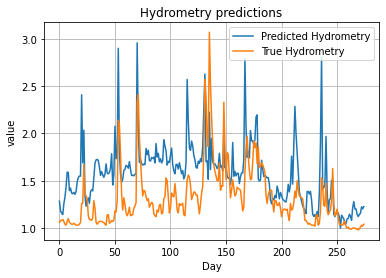

In [10]:
input_layer = keras.Input(shape=(15,))
hidden_1 = keras.layers.Dense(8, activation = 'relu')(input_layer)
output_layer = keras.layers.Dense(1, activation='linear')(hidden_1)
model_ra = keras.Model(input_layer, output_layer)
model_ra.compile(optimizer='adam', loss="mse", metrics="accuracy", weighted_metrics=['mse'])
hist = model_ra.fit(X_train_scaled_ra, y_train_ra, validation_data=(X_test_scaled_ra, y_test_ra), epochs=100, batch_size=16, callbacks=early_stopping, verbose=1)

y_pred_ra = model_ra.predict(X_test_scaled_ra)
y_pred_ra = pd.DataFrame(y_pred_ra)
display(y_pred_ra)
y_test_display_ra = pd.DataFrame.reset_index(y_test_ra).drop(["index"], axis=1)
display(y_test_display_ra)
plt.plot(y_pred_ra)
plt.plot(y_test_display_ra)
print("MSE: %f" %(sklearn.metrics.mean_squared_error(y_test_display_ra, y_pred_ra)))
plt.title('Hydrometry predictions')
plt.xlabel('Day')
plt.ylabel('value')
plt.legend(['Predicted Hydrometry','True Hydrometry'])
plt.grid()
plt.show()

In [ ]:
optimizers = ['adam']
neurons = [16]
batches = [16]
epochs = [100, 200]
early_stopping = keras.callbacks.EarlyStopping(monitor="loss", patience=5)
param_grid_ra = dict(batch_size=batches, optimizer=optimizers, epochs=epochs, neurons=neurons)
hp_model_ra = keras.wrappers.scikit_learn.KerasClassifier(build_fn=mlp_model_ra, verbose=0)
grid_ra = GridSearchCV(estimator = hp_model_ra, param_grid = param_grid_ra, n_jobs = 2)
grid_result_ra = grid_ra.fit(X_train_scaled_ra, y_train_ra, validation_data=(X_test_scaled_ra, y_test_ra), callbacks=[early_stopping])
print("Best params (RA): {}".format(grid_result_ra.best_params_))

y_pred_ra = grid_ra.best_estimator_.model.predict(X_test_scaled_ra)
y_pred_ra = pd.DataFrame(y_pred_ra)
display(y_pred_ra)
y_test_display_ra = pd.DataFrame.reset_index(y_test_ra).drop(["index"], axis=1)
display(y_test_display_ra)
plt.figure(figsize=(20,8))
plt.plot(y_pred_ra)
plt.plot(y_test_display_ra)
print("MSE: %f" %(sklearn.metrics.mean_squared_error(y_test_display_ra, y_pred_ra)))
plt.title('Hydrometry predictions')
plt.xlabel('Day')
plt.ylabel('value')
plt.legend(['Predicted Hydrometry','True Hydrometry'])
plt.grid()
plt.show()

Best mse: 0.14198850095272064
Best validation mse: 0.11156690120697021


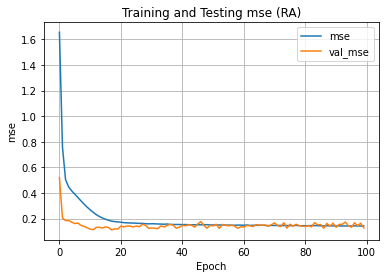

In [9]:
hist = mlp_model_ra('adam', 16).fit(X_train_scaled_ra, y_train_ra, validation_data=(X_test_scaled_ra, y_test_ra), epochs=100, batch_size=16, callbacks=early_stopping, verbose=0)
print("Best mse: {}".format(min(hist.history['mse'])))
print("Best validation mse: {}".format(min(hist.history['val_mse'])))
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('Training and Testing mse (RA)')
plt.xlabel('Epoch')
plt.ylabel('mse')
plt.legend(['mse','val_mse'])
plt.grid()
plt.show()